# ch03.03 NLP기초 - 순환 신경망
---

* 날짜:
* 이름:


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - RNN
    - GRU
    - LSTM

```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 714 (delta 176), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (714/714), 38.09 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (369/369), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *
```

In [3]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *

## imdb 베이스 모델
---

### **| imdb 데이터 처리**
```
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)
```

In [13]:
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)

(25000, 256) (25000, 256)


### **| FCN with GlobalAveragePooling1D**

Model: "FCNwithGAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 256, 32)           320000    
                                                                 
 global_average_pooling1d_3   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 1s 6ms/step - loss: 0.6811 - acc: 0.6928 - val_loss: 0.6646 - 

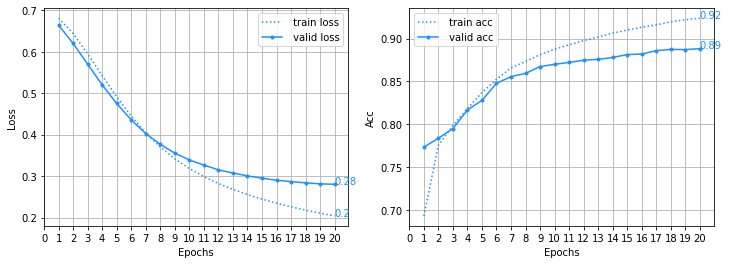

In [14]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GlobalAveragePooling1D()(y)
y = layers.Dense(1, activation='sigmoid')(y)
model=models.Model(x,y, name='FCNwithGAP')
model.summary()

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

## RNN
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image6_f6vds6.png width=800>
</p>

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 256, 32)           320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 44s 251ms/step - loss: 0.6930 - acc: 0.5140 - val_loss: 0.6861 - val_acc: 0.5358
Epoch 2/5
157/157 [==============================] - 38

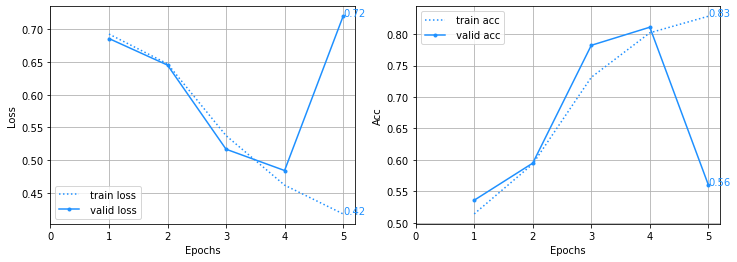

In [12]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.SimpleRNN(32)(y)
y = layers.Dense(1, activation='sigmoid')(y)
model=models.Model(x,y, name='RNN')
model.summary()

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

## LSTM
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image3_nsnxp3.png width=600>
</p>



Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 256, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 5s 18ms/step - loss: 0.6781 - acc: 0.5605 - val_loss: 0.6334 - val_acc: 0.7314
Epoch 2/20
157/157 [==============================] - 2s

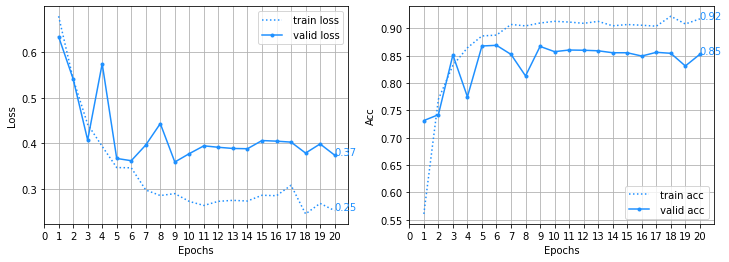

In [17]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32)(y)
y = layers.Dense(1, activation='sigmoid')(y)
model=models.Model(x,y, name='RNN')
model.summary()

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_14 (Embedding)    (None, 256, 32)           320000    
                                                                 
 lstm_6 (LSTM)               (None, 256, 32)           8320      
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 8s 

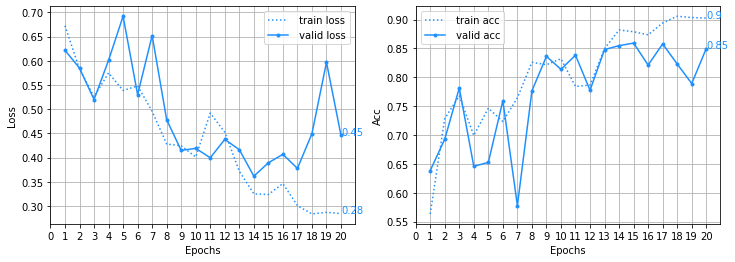

In [20]:
EMB_DIMS = 32
x = layers.Input(shape=MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32, return_sequences=True)(y) #2차 텐서가 출력된다.
y = layers.LSTM(32, return_sequences=False)(y) #1차 텐서가 출력된다.
y = layers.Dense(1, activation='sigmoid')(y) 
model=models.Model(x,y, name='RNN')
model.summary()

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
plot_lcurve([history],[''],['dodgerblue'])

## GRU
---


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image10_zgefie.png width=600>
</p>



### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>
